In [1]:
# halutaan plotata inline
%matplotlib inline

# aikamoduuli
from time import time

# numpy-moduuli
import numpy as np

# sk-moduuli
from sklearn import random_projection, decomposition, manifold

# visualisointimoduulit
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [8]:
# ladataan data ja jaotellaan se
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X = X_train[:1024] #0-1024 elementtiä
y = y_train[:1024]

# datasettien suuruus
print("MNIST data ja sen suuruus: train:", len(X_train), "test:", len(X_test))
# suuruus ja muoto
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

# käytettävän datan suuruus ja muoto
print("X:", X.shape)
print("y:", y.shape)

MNIST data ja sen suuruus: train: 60000 test: 10000
X_train: (60000, 28, 28)
y_train: (60000,)
X: (1024, 28, 28)
y: (1024,)


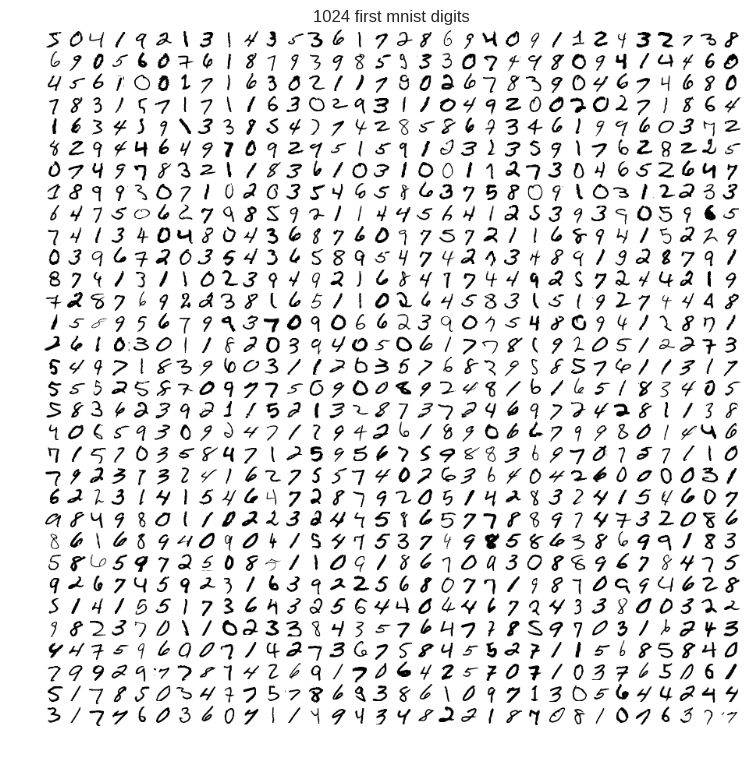

In [15]:
n_img_per_row = 32
img = np.zeros((28 * n_img_per_row, 28 * n_img_per_row))

for i in range(n_img_per_row):
    ix = 28 * i
    for j in range(n_img_per_row):
        iy = 28 * j
        img[ix:ix + 28, iy:iy + 28] = X[i * n_img_per_row + j, :, :]
        
plt.figure(figsize=(9, 9))
plt.imshow(img)
plt.title('1024 first mnist digits')
ax = plt.axis("off")


In [16]:
def plot_embedding(X, title=None, t0=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(9,6))
    plt.axis('off')
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if title is not None:
        if t0 is not None:
            plt.title("%s (%.2fs)" % (title, (time()-t0)))
        else:
            plt.title(title)

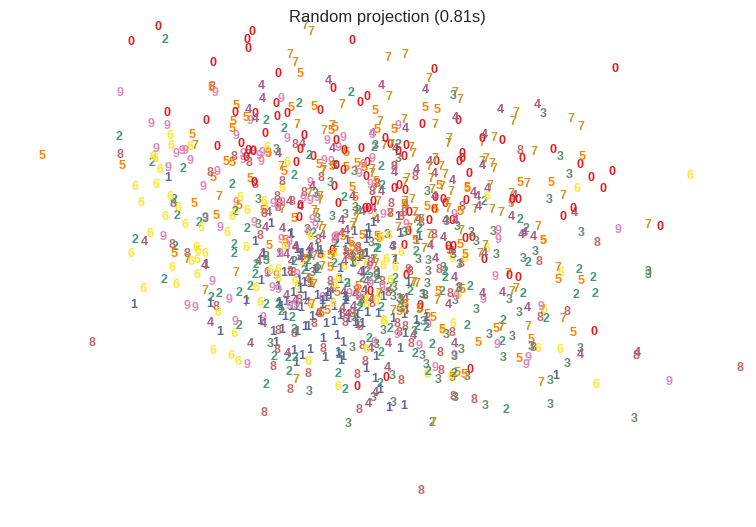

In [17]:
t0 = time()
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X.reshape(-1,28*28))
plot_embedding(X_projected, "Random projection", t0)

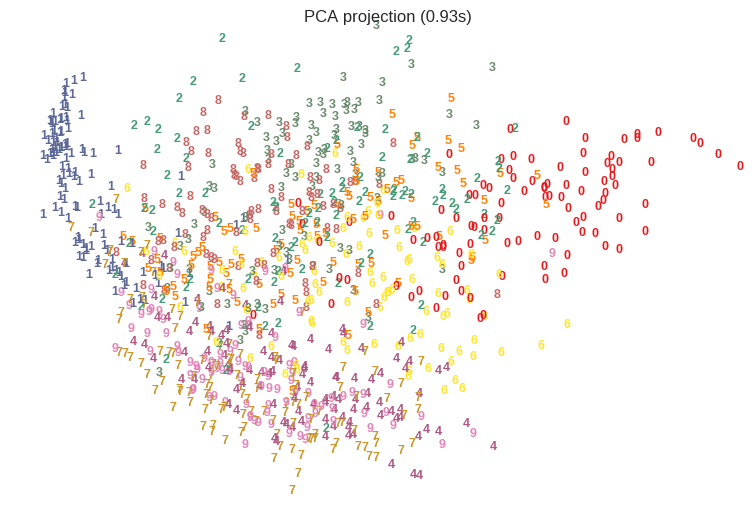

In [18]:
t0 = time()
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X.reshape(-1,28*28))
plot_embedding(X_pca, "PCA projection", t0)

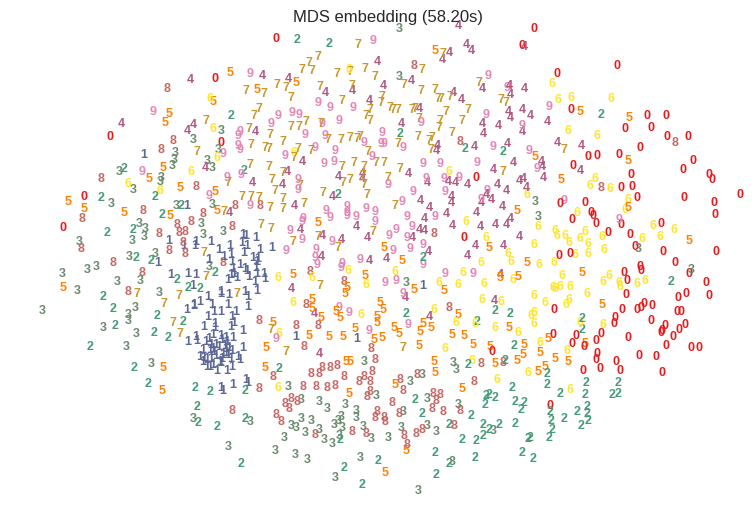

In [19]:
t0 = time()
mds = manifold.MDS(n_components=2, max_iter=500)
X_mds = mds.fit_transform(X.reshape(-1,28*28))
plot_embedding(X_mds, "MDS embedding", t0)

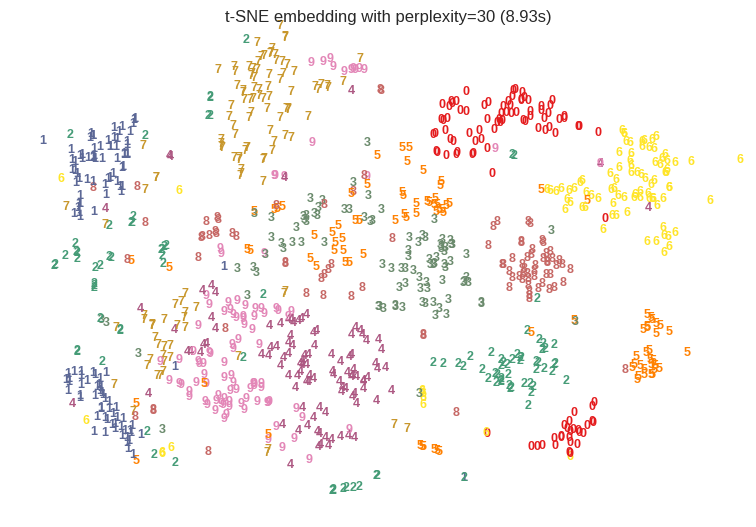

In [20]:
t0 = time()
perplexity=30
tsne = manifold.TSNE(n_components=2, perplexity=perplexity)
X_tsne = tsne.fit_transform(X.reshape(-1,28*28))
plot_embedding(X_tsne, "t-SNE embedding with perplexity=%d" % perplexity, t0)